### **CAR PRICE PREDICTION**

#### **IMPORT LIBRARIES**

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

#### **LOAD DATASET**

In [87]:
car_df=pd.read_csv("car data.csv")
car_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [88]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [89]:
car_df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [90]:
car_df.shape

(301, 9)

In [91]:
car_df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [92]:
car_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

#### **DATA CLEANING**

In [93]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### **EDA**

In [94]:
#define target(y) and Features(X)
y=car_df['Selling_Price']
x=car_df.drop("Selling_Price",axis=1)

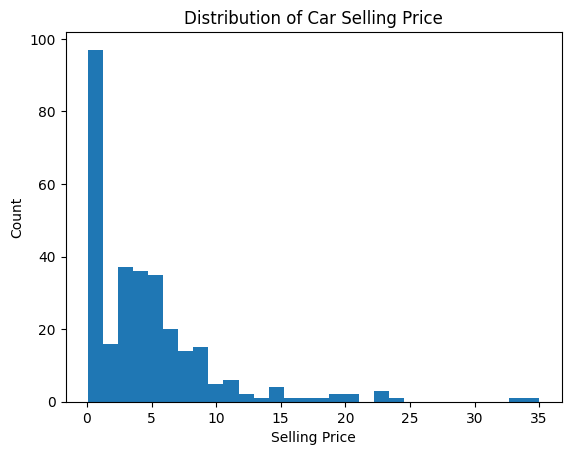

In [95]:
#price distribution
plt.hist(y,bins=30)
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.title("Distribution of Car Selling Price")
plt.show()

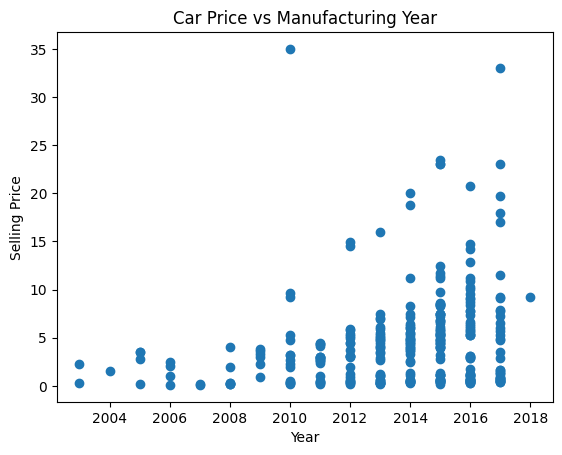

In [96]:
#year Vs price
plt.scatter(car_df["Year"], car_df["Selling_Price"])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Car Price vs Manufacturing Year")
plt.show()


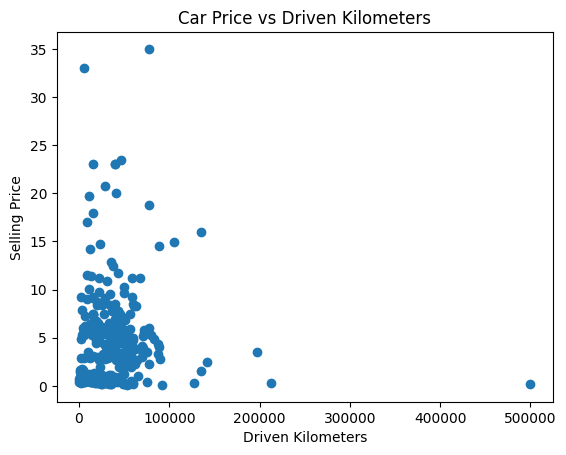

In [97]:
#driven km Vs price
plt.scatter(car_df["Driven_kms"], car_df["Selling_Price"])
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price")
plt.title("Car Price vs Driven Kilometers")
plt.show()


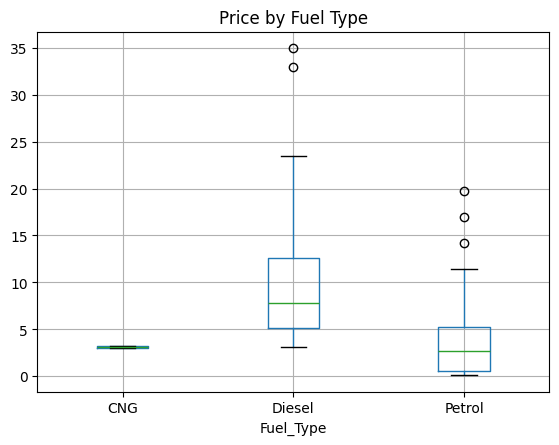

In [98]:
#fuel type impact on price
car_df.boxplot(column="Selling_Price", by="Fuel_Type")
plt.title("Price by Fuel Type")
plt.suptitle("")
plt.show()


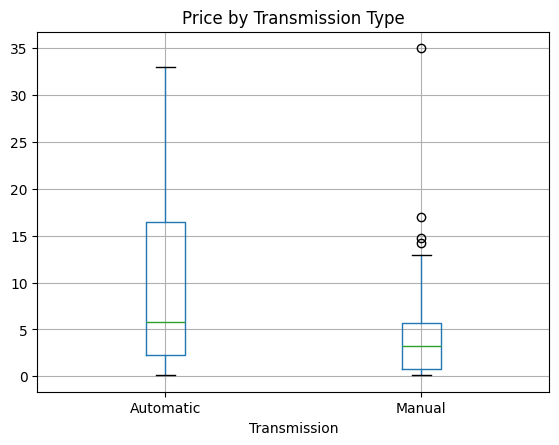

In [99]:
# trasmission effect
car_df.boxplot(column="Selling_Price", by="Transmission")
plt.title("Price by Transmission Type")
plt.suptitle("")
plt.show()


#### **MODEL TRAINING**

In [100]:
car_df=car_df.drop("Car_Name", axis=1)
y=car_df['Selling_Price']
X=car_df.drop("Selling_Price",axis=1)
X=pd.get_dummies(x,drop_first=True)

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [102]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
y_pred = model.predict(X_test)
print(y_pred)

[ 7.47327051  9.58880632  5.56883578 -0.40941815  8.55896043  6.88890857
  1.47635719  6.23695329  0.98014478  6.68925428 15.63172868  0.29557627
  7.97759508  8.08373759  6.19289061  2.70151483  2.72386344 10.98923224
  7.77090451  8.56271721  5.55477855  7.63455899  5.6498586   1.89746929
  6.25342368  3.48912822  5.48662283  1.6085983   2.6805568   2.67421952
 -0.03307212  9.11656913 -2.33116821  1.98326133  8.36119393  3.98900218
  6.09888859  6.17398282  4.27677317  6.74710603  5.51688689  8.34755944
  3.67455712  0.25706046 13.06489129  0.04497286  8.34319661  9.55198302
  3.90152259  4.03845455  5.9287072   2.70075543 22.92984367 20.60225579
  7.30522747  9.84045173  4.59171221  8.91665681  0.05897455  6.62617599
  3.66819743]


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(2.0365174791056764, np.float64(3.0366248357470633), 0.5997023481234547)

In [105]:
import pandas as pd

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
101,Fuel_Type_Diesel,2.505218
102,Fuel_Type_Petrol,1.905740
1,Present_Price,0.602137
0,Year,0.580145
3,Owner,0.270089
...,...,...
82,Car_Name_etios gd,-7.838031
65,Car_Name_alto 800,-7.850603
74,Car_Name_corolla altis,-8.748299
70,Car_Name_camry,-13.582165


In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
rf_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
r2_rf = r2_score(y_test, rf_pred)

mae_rf, rmse_rf, r2_rf


(0.5991811475409826, np.float64(0.9048483046263854), 0.9644571443948353)

In [108]:
#error analysis
#1.create an error dataFrame
error_df = pd.DataFrame({
    "Actual_Price": y_test,
    "Predicted_Price": rf_pred,
})

error_df["Error"] = error_df["Actual_Price"] - error_df["Predicted_Price"]
error_df.head()


,Actual_Price,Predicted_Price,Error
177,0.35,0.42415,-0.07415
289,10.11,10.48520,-0.37520
228,4.95,4.95575,-0.00575
198,0.15,0.20385,-0.05385
60,6.95,7.56810,-0.61810


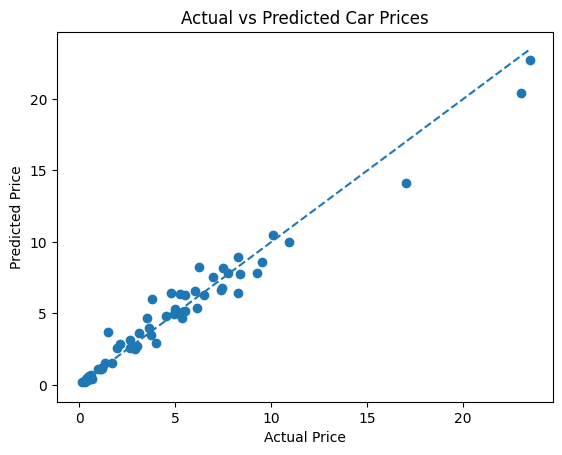

In [109]:
#Actual Vs Predicted Plot
plt.scatter(error_df["Actual_Price"], error_df["Predicted_Price"])
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()



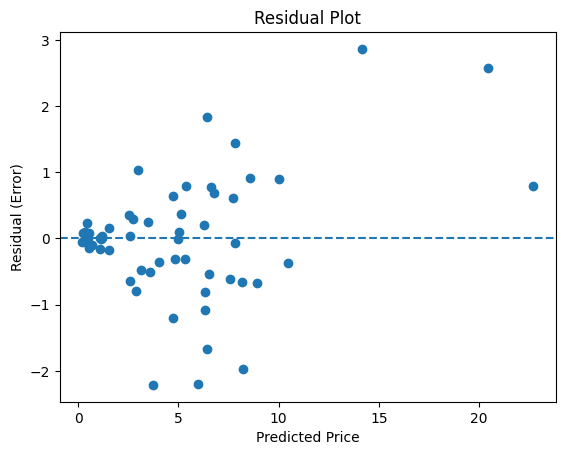

In [110]:
#residual plot
plt.scatter(error_df["Predicted_Price"], error_df["Error"])
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot")
plt.show()


In [111]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


#### **I used Linear Regression as a baseline to understand feature relationships and establish minimum performance. Since car prices show non-linear behavior and interaction effects, I then used Random Forest to capture complex patterns, which significantly improved MAE and R².**

In [112]:
rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [113]:
grid.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [114]:
grid.best_estimator_

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [115]:
best_model = grid.best_estimator_


In [116]:
best_pred = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, best_pred)
rmse_best = np.sqrt(mean_squared_error(y_test, best_pred))
r2_best = r2_score(y_test, best_pred)

mae_best, rmse_best, r2_best


(0.5907950819672131, np.float64(0.8674113062799534), 0.9673373873539192)

#### **PREDICTION**

In [122]:
#create a new dataframe to check the car price
new_car = pd.DataFrame([{
    "Year": 2018,
    "Present_Price": 7.5,
    "Driven_kms": 45000,
    "Owner": 0,
    "Fuel_Type": "Petrol",
    "Selling_type": "Dealer",
    "Transmission": "Manual"
}])


In [118]:
X_encoded = pd.get_dummies(X, drop_first=True)
new_car_encoded = pd.get_dummies(new_car)

new_car_encoded = new_car_encoded.reindex(
    columns=X_encoded.columns,
    fill_value=0
)


In [120]:
predicted_price = best_model.predict(new_car_encoded)
print(f"Predicted Selling Price: ₹{predicted_price[0]:.2f} Lakhs")



Predicted Selling Price: ₹5.40 Lakhs
